In [51]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, precision_score, recall_score, f1_score

# Load your dataset (replace 'your_dataset.csv' with your actual dataset file)
data = pd.read_csv('C:\\Users\\JM\\Desktop\\Dataset.csv')
data.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0,0,0,0,0,0,0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0,0,0,0,0,0,0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0,0,0,0,0,0,0,BENIGN,131,HTTP_PROXY


In [52]:
data.shape

(999, 87)

In [53]:
data.isnull().sum()

Flow.ID             0
Source.IP           0
Source.Port         0
Destination.IP      0
Destination.Port    0
                   ..
Idle.Max            0
Idle.Min            0
Label               0
L7Protocol          0
ProtocolName        0
Length: 87, dtype: int64

In [54]:
data.columns

Index(['Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP',
       'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration',
       'Total.Fwd.Packets', 'Total.Backward.Packets',
       'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets',
       'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min',
       'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std',
       'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min',
       'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s',
       'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max',
       'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std',
       'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean',
       'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags',
       'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length',
       'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s',
       'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean',
  

In [55]:
# Exploratory Data Analysis (EDA)
# Display basic info about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 87 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Flow.ID                      999 non-null    object 
 1   Source.IP                    999 non-null    object 
 2   Source.Port                  999 non-null    int64  
 3   Destination.IP               999 non-null    object 
 4   Destination.Port             999 non-null    int64  
 5   Protocol                     999 non-null    int64  
 6   Timestamp                    999 non-null    object 
 7   Flow.Duration                999 non-null    int64  
 8   Total.Fwd.Packets            999 non-null    int64  
 9   Total.Backward.Packets       999 non-null    int64  
 10  Total.Length.of.Fwd.Packets  999 non-null    int64  
 11  Total.Length.of.Bwd.Packets  999 non-null    int64  
 12  Fwd.Packet.Length.Max        999 non-null    int64  
 13  Fwd.Packet.Length.Mi

In [56]:
#ll the non-numeric columns
non_num_cols = [col for col in data.columns if data[col].dtype == 'O']
non_num_data = data[non_num_cols]
non_num_data

,Flow.ID,Source.IP,Destination.IP,Timestamp,Label,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,172.19.1.46,26/04/201711:11:17,BENIGN,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,10.200.7.217,26/04/201711:11:17,BENIGN,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,10.200.7.7,26/04/201711:11:17,BENIGN,HTTP_PROXY
...,...,...,...,...,...,...
994,206.54.177.161-10.200.7.194-443-45442-6,10.200.7.194,206.54.177.161,26/04/201711:11:23,BENIGN,TOR
995,206.54.177.161-10.200.7.194-443-45442-6,10.200.7.194,206.54.177.161,26/04/201711:11:23,BENIGN,TOR
996,192.168.180.51-10.200.7.4-57844-3128-6,192.168.180.51,10.200.7.4,26/04/201711:11:23,BENIGN,HTTP_CONNECT
997,192.168.180.51-10.200.7.4-57844-3128-6,10.200.7.4,192.168.180.51,26/04/201711:11:23,BENIGN,HTTP


In [57]:
 # Summary of Flow.ID column
def summarize_cat(col_name):
    sorted_values = sorted(non_num_data[col_name].value_counts().items(), key = lambda x:x[1], reverse=True)
    remaining_per = 100
    for (value, count) in sorted_values:
        per = count / len(non_num_data) * 100
        if per >= 1:
            print(f'{value} : {per:.2f}%')
        else :
            print(f'Others : {remaining_per:.2f}%')
            break
        remaining_per = remaining_per - per
        
   
for col in non_num_cols:
    print(f"Summary of {col} column : ")
    summarize_cat(col)
    print('\n')

Summary of Flow.ID column : 
Others : 100.00%


Summary of Source.IP column : 
10.200.7.4 : 14.61%
192.168.180.51 : 11.31%
10.200.7.194 : 11.21%
10.200.7.217 : 7.71%
10.200.7.9 : 6.71%
192.168.72.43 : 6.01%
10.200.7.199 : 6.01%
10.200.7.6 : 5.01%
10.200.7.196 : 4.00%
10.200.7.5 : 3.20%
10.200.7.195 : 2.10%
192.168.180.37 : 1.90%
10.200.7.7 : 1.60%
192.168.42.31 : 1.40%
172.19.1.46 : 1.30%
192.168.10.47 : 1.30%
192.168.90.102 : 1.10%
192.168.220.177 : 1.10%
Others : 12.41%


Summary of Destination.IP column : 
192.168.180.51 : 14.11%
10.200.7.4 : 11.61%
10.200.7.7 : 9.81%
212.124.124.94 : 6.01%
10.200.7.9 : 5.11%
192.168.180.37 : 4.70%
10.200.7.6 : 4.20%
10.200.7.217 : 2.50%
10.200.7.5 : 2.20%
192.168.42.31 : 2.10%
207.244.80.182 : 1.90%
69.172.216.55 : 1.60%
192.168.32.49 : 1.50%
104.91.156.236 : 1.50%
192.168.220.177 : 1.30%
192.168.10.47 : 1.20%
69.172.216.111 : 1.20%
179.1.4.237 : 1.00%
Others : 26.43%


Summary of Timestamp column : 
26/04/201711:11:22 : 21.92%
26/04/201711:11:21 :

In [58]:
#Exploratory Analysis for numeric columns
num_cols = list(set(data.columns) - set(non_num_cols))
num_cols

['Subflow.Fwd.Packets',
 'Fwd.URG.Flags',
 'Idle.Std',
 'Total.Fwd.Packets',
 'Subflow.Bwd.Bytes',
 'Bwd.Packet.Length.Std',
 'Fwd.IAT.Min',
 'min_seg_size_forward',
 'Fwd.Avg.Bytes.Bulk',
 'Packet.Length.Mean',
 'Idle.Max',
 'Min.Packet.Length',
 'Fwd.PSH.Flags',
 'Bwd.URG.Flags',
 'Flow.Packets.s',
 'Active.Min',
 'Fwd.Packet.Length.Mean',
 'Total.Length.of.Bwd.Packets',
 'Fwd.Header.Length.1',
 'RST.Flag.Count',
 'Bwd.Packets.s',
 'ECE.Flag.Count',
 'Bwd.IAT.Min',
 'Fwd.Header.Length',
 'Packet.Length.Variance',
 'Flow.IAT.Max',
 'ACK.Flag.Count',
 'Idle.Min',
 'Bwd.IAT.Max',
 'Subflow.Bwd.Packets',
 'Fwd.IAT.Total',
 'Total.Length.of.Fwd.Packets',
 'Subflow.Fwd.Bytes',
 'Average.Packet.Size',
 'Active.Std',
 'Bwd.IAT.Std',
 'Source.Port',
 'Active.Mean',
 'Flow.Bytes.s',
 'L7Protocol',
 'Fwd.Packets.s',
 'Active.Max',
 'Total.Backward.Packets',
 'Flow.IAT.Std',
 'Bwd.Avg.Bytes.Bulk',
 'Fwd.Avg.Packets.Bulk',
 'SYN.Flag.Count',
 'Fwd.IAT.Max',
 'Bwd.Avg.Packets.Bulk',
 'Fwd.Packet.L

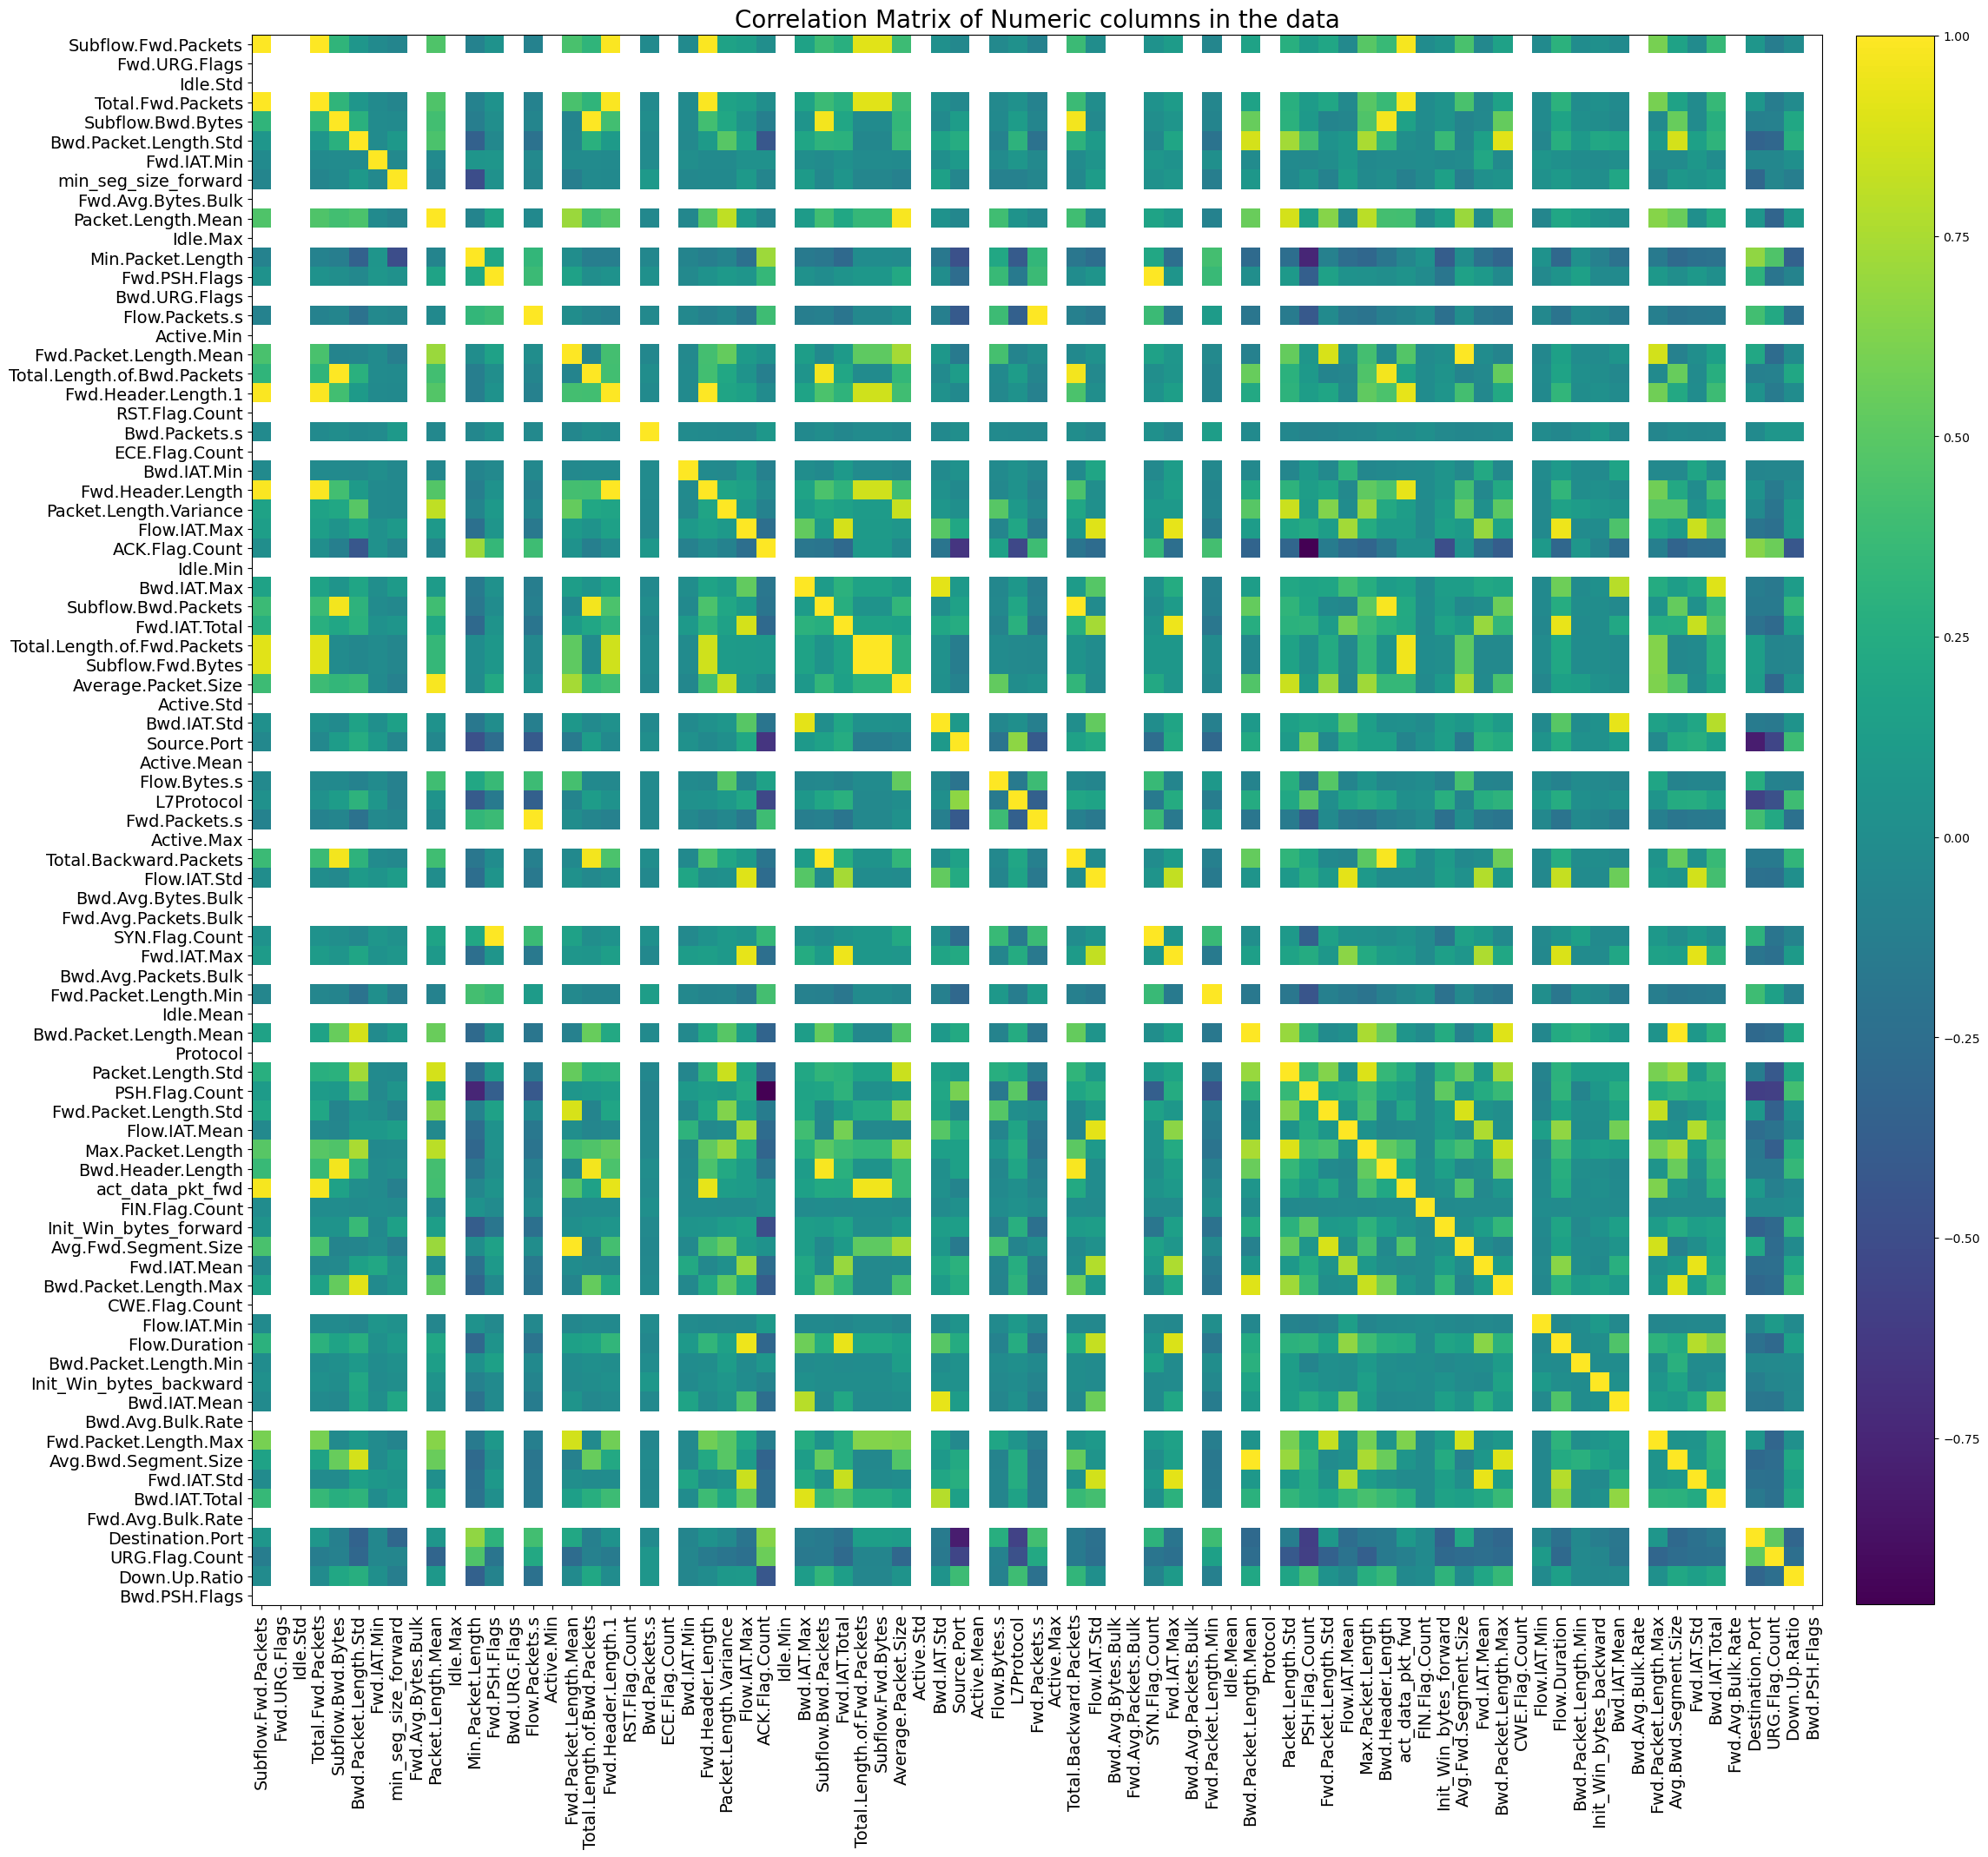

In [59]:
#Correlation Matrx
corr = data[num_cols].corr()

f = plt.figure(figsize = (25,25))
plt.matshow(corr, fignum=f.number)
plt.title('Correlation Matrix of Numeric columns in the data', fontsize = 20)
plt.xticks(range(len(num_cols)), num_cols, fontsize = 14, rotation = 90)
plt.yticks(range(len(num_cols)), num_cols, fontsize = 14)
plt.gca().xaxis.set_ticks_position('bottom')
cb = plt.colorbar(fraction = 0.0466, pad = 0.02)
cb.ax.tick_params(labelsize=10)
plt.show()

In [60]:
# Identify categorical columns
categorical_cols = [col for col in data.columns if data[col].dtype == 'object']

# Perform label encoding for categorical columns
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])


dataX=data.drop(["Total.Length.of.Fwd.Packets"],axis=1)
dataY=data['Total.Length.of.Fwd.Packets']

trainX,testX,trainY,testY=train_test_split(dataX,dataY,test_size = 0.2)
from sklearn.linear_model import LinearRegression
LM_clf=LinearRegression()
LM_clf.fit(trainX,trainY)
predictY=LM_clf.predict(testX)
from sklearn.metrics import r2_score
r2_score(testY,predictY)   


1.0

In [61]:
from sklearn.model_selection import train_test_split

# Ensure that the dataset has enough samples for splitting
if len(data) > 0:
    # Split the data into training and testing sets
    trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.5, random_state=42)  # Adjust the random_state as needed
else:
    print("Error: The dataset does not contain any samples.")

# Proceed with model training and evaluation if the dataset has samples
if len(trainX) > 0 and len(testX) > 0:
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score

    # Train the Linear Regression model
    LM_clf = LinearRegression()
    LM_clf.fit(trainX, trainY)

    # Make predictions
    predictY = LM_clf.predict(testX)

    # Evaluate the model
    r2 = r2_score(testY, predictY)
    print("Linear Regression R^2 Score:", r2)
else:
    print("Error: Unable to split the dataset.")


Linear Regression R^2 Score: 1.0


In [64]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor
RF_clf = RandomForestRegressor()

# Fit the model to the training data
RF_clf.fit(trainX, trainY)

# Predict on the test data
predictRF = RF_clf.predict(testX)

# Evaluate the model
r2_score(testY, predictRF)

0.9943616696057312

In [71]:
# Split the data into training and testing sets
trainX, testX, trainY, testY = train_test_split(dataX, dataY, test_size=0.2)

# Train Linear Regression model
LM_clf = LinearRegression()
LM_clf.fit(trainX, trainY)

# Predictions
predictY = LM_clf.predict(testX)

# Evaluate Linear Regression model
r2 = r2_score(testY, predictY)

# Train Random Forest Regressor
rf_clf = RandomForestRegressor()
rf_clf.fit(trainX, trainY)

# Predictions
rf_predictions = rf_clf.predict(testX)

# Evaluate Random Forest model
precision = precision_score(testY, rf_predictions.round(), average='weighted')
recall = recall_score(testY, rf_predictions.round(), average='weighted')
f1 = f1_score(testY, rf_predictions.round(), average='weighted')

# Print results
print("Linear Regression R^2 Score:", r2)
print("Random Forest Precision:", precision)
print("Random Forest Recall:", recall)
print("Random Forest F1-Score:", f1)

Linear Regression R^2 Score: 1.0
Random Forest Precision: 0.4315
Random Forest Recall: 0.42
Random Forest F1-Score: 0.4219166666666667


C:\Users\JM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JM\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText

# Email configuration
sender_email = "jmuthama352@gmail.com"  # Change this to your email address
receiver_email = "muthama636@gmail.com"  # Change this to the administrator's email address
password = "jmjose01@P"  # Change this to your email password
smtp_server = "smtp.gsmtp.com"  # Change this to your SMTP server
smtp_port = 465  # Change this to the SMTP server port

# Define server variable outside the try block
server = None

# Detect abrupt surges based on Total Length of Forward Packets
threshold = 25000  # Adjust the threshold as needed
abrupt_surge_indices = [i for i, length in enumerate(data['Total.Length.of.Fwd.Packets']) if length > threshold]

# Print surge detection messages with Protocol and Source/Destination IP
if abrupt_surge_indices:
    message = "Surges detected based on Total Length of Forward Packets:\n"
    for i in abrupt_surge_indices:
        message += f"Total Length of Fwd Packets: {data['Total.Length.of.Fwd.Packets'][i]}\n"
else:
    message = "No surges detected based on Total Length of Forward Packets."

# Send email alert
if abrupt_surge_indices:
    try:
        server = smtplib.SMTP(smtp_server, smtp_port)
        server.starttls()
        server.login(sender_email, password)

        msg = MIMEMultipart()
        msg['From'] = sender_email
        msg['To'] = receiver_email
        msg['Subject'] = "Surge Detected in Network Traffic"

        body = message
        msg.attach(MIMEText(body, 'plain'))

        server.send_message(msg)
        del msg

        print("Email alert sent successfully!")

    except smtplib.SMTPException as e:
        print("Failed to send email alert:", e)

    except Exception as e:
        print("An error occurred:", e)

    finally:
        if server:
            server.quit()

An error occurred: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond


In [69]:
import http.client
import json


# Load data from 'data.csv'
data = pd.read_csv('C:\\Users\\JM\\Desktop\\Dataset.csv')

# Define the threshold for surges
threshold = 25000

# Filter data for surges based on threshold
abrupt_surge_indices = data[data['Total.Length.of.Fwd.Packets'] > threshold].index.tolist()

# Prepare SMS message
if abrupt_surge_indices:
    message = "Hellooooo!!! Get back to your desk Nooooooow!!!\nSurges detected on Total Length of Forward Packets:\n"
    for i in abrupt_surge_indices:
        message += f"Total Length of Fwd Packets: {data.loc[i, 'Total.Length.of.Fwd.Packets']}\n"
else:
    message = "No surges detected based on Total Length of Forward Packets."

conn = http.client.HTTPSConnection("ggzvve.api.infobip.com")
payload = json.dumps({
    "messages": [
        {
            "destinations": [{"to":"254798999807"}],
            "from": "ServiceSMS",
            "text": message
        }
    ]
})
headers = {
    'Authorization': 'App 4f24ed75500dacbcbefe51937da70bfc-e1f95dae-3924-4579-b2bc-7e98a745469c',
    'Content-Type': 'application/json',
    'Accept': 'application/json'
}
conn.request("POST", "/sms/2/text/advanced", payload, headers)
res = conn.getresponse()
data = res.read()
print(data.decode("utf-8"))

{"messages":[{"messageId":"4117952761214335950625","status":{"description":"Message sent to next instance","groupId":1,"groupName":"PENDING","id":26,"name":"PENDING_ACCEPTED"},"to":"254798999807"}]}


In [70]:
import http.client
import json


# Load data from 'data.csv'
data = pd.read_csv('C:\\Users\\JM\\Desktop\\Dataset.csv')

# Define the threshold for surges
threshold = 25000

# Filter data for surges based on threshold
abrupt_surge_indices = data[data['Total.Length.of.Fwd.Packets'] > threshold].index.tolist()

# Prepare SMS message
if abrupt_surge_indices:
    message = "Hellooooo!!! Get back to your desk Nooooooow!!!\nSurges detected on Total Length of Forward Packets:\n"
    for i in abrupt_surge_indices:
        message += f"Total Length of Fwd Packets: {data.loc[i, 'Total.Length.of.Fwd.Packets']}\n"
else:
    message = "No surges detected based on Total Length of Forward Packets."

conn = http.client.HTTPSConnection("ggzvve.api.infobip.com")
payload = json.dumps({
    "messages": [
        {
            "destinations": [{"to":"254798999807"}],
            "from": "ServiceSMS",
            "text":"""To address network surges, follow these documented steps:

1. Determine if the surge is due to increased traffic, network congestion, or a specific device or application causing the surge.

2. Utilize network monitoring tools to track bandwidth usage, CPU utilization, and equipment performance to pinpoint the source of the surge. 

3. Adjust network settings, such as Quality of Service (QoS) policies, to prioritize critical traffic and alleviate congestion during peak usage periods. 

4. Consider upgrading network equipment, such as routers, switches, and firewalls, to handle increased bandwidth demands and prevent bottlenecks. 

5. Use traffic shaping techniques to regulate the flow of data and prevent sudden spikes in traffic from overwhelming the network. 

6. Ensure that network devices have the latest firmware and software updates installed to address security vulnerabilities and improve performance. 

7. Distribute network traffic evenly across multiple servers or connections to prevent individual components from becoming overloaded during surges.

8. Increase network bandwidth or add additional resources to accommodate growing traffic demands and prevent future surges. 

9. Continuously monitor network performance and adjust configurations as needed to adapt to changing usage patterns and mitigate surges effectively. 
"""
        }
    ]
})
headers = {
    'Authorization': 'App 4f24ed75500dacbcbefe51937da70bfc-e1f95dae-3924-4579-b2bc-7e98a745469c',
    'Content-Type': 'application/json',
    'Accept': 'application/json'
}
conn.request("POST", "/sms/2/text/advanced", payload, headers)
res = conn.getresponse()
data = res.read()
print(data.decode("utf-8"))

{"messages":[{"messageId":"4117952965534335789207","status":{"description":"Message sent to next instance","groupId":1,"groupName":"PENDING","id":26,"name":"PENDING_ACCEPTED"},"to":"254798999807"}]}
